<a href="https://colab.research.google.com/github/olsonjl1986/university-of--austin-texas/blob/main/Sentiment_Analysis_project_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Steps:**
- Import the necessary libraries
- Get the data
- Explore the data
- Do feature engineering (create relevant columns based on existing columns)
- Plot the wordcloud based on the relevant column
- Do pre-processing
- Noise removal (Special character, html tags, numbers, 
stopword removal)
- Lowercasing
- Stemming / lemmatization
- Text to number: Vectorization
- CountVectorizer
- TfidfVectorizer
- Build Machine Learning Model for Text Classification.
- Optimize the parameter
- Plot the worldcloud based on the most important features
- Check the performance of the model
- Summary


Background and Context:

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

In [ ]:
!pip install contractions

     |████████████████████████████████| 284 kB 4.3 MB/s 
     |████████████████████████████████| 106 kB 53.8 MB/s 


In [ ]:
# install and import necessary libraries.

!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library. Fixes contractions such as `you're` to you `are`
from bs4 import BeautifulSoup                           # Import BeautifulSoup. Beautiful Soup is a Python library that is used for web scraping purposes 
                                                        # To pull the data out of HTML and XML files by removing the HTML tags.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF


nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')                                  # Tokenizer divides a text into a list of sentence
nltk.download('wordnet')            # WordNet is a lexical database for the English language, which was created by Princeton, and is part of the NLTK corpus

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt                         # Import plt for visualization

import matplotlib.pyplot as plt   
import seaborn as sns

     |████████████████████████████████| 284 kB 4.1 MB/s 
     |████████████████████████████████| 106 kB 78.3 MB/s 
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
#data=pd.read_csv('drive/My Drive/Colab Notebooks/Tweets.csv')
data=pd.read_csv('drive/My Drive/Tweets.csv')

In [ ]:
data.shape                                               # print shape of data.

(14640, 15)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
list(data.columns.values)

['tweet_id',
 'airline_sentiment',
 'airline_sentiment_confidence',
 'negativereason',
 'negativereason_confidence',
 'airline',
 'airline_sentiment_gold',
 'name',
 'negativereason_gold',
 'retweet_count',
 'text',
 'tweet_coord',
 'tweet_created',
 'tweet_location',
 'user_timezone']

In [ ]:
for i in list(data.columns.values):
  print("*",i)

* tweet_id
* airline_sentiment
* airline_sentiment_confidence
* negativereason
* negativereason_confidence
* airline
* airline_sentiment_gold
* name
* negativereason_gold
* retweet_count
* text
* tweet_coord
* tweet_created
* tweet_location
* user_timezone


## Dataset:

* tweet_id
* airline_sentiment:Sentiment for tweet good or bad
* airline_sentiment_confidence: confidence of sentiment
* negativereason: specific negative reason
* negativereason_confidence: confidence level of negative reason
* airline: specific airline company
* airline_sentiment_gold: 
* name
* negativereason_gold
* retweet_count
* text
* tweet_coord
* tweet_created
* tweet_location
* user_timezone

In [ ]:
data.head()                                              # Print first 5 rows of data.

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
 data.head()                                                            

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:

def eda_graphs(data):

  fig1 = plt.figure(figsize = (12, 12))

  sns.countplot(data = data, x = 'airline')

  #plt.legend(loc='best')
  plt.xlabel('Airline', size = 14)
  plt.ylabel('Count', size = 14)
  plt.title('Total number of tweets per airline', fontsize = 14)
  plt.show()




  fig = plt.figure(figsize = (12, 12))

  sns.countplot(data = data, x = 'airline_sentiment',)

  #plt.legend(loc='best')
  plt.xlabel('Sentiment', size = 14)
  plt.ylabel('Count', size = 14)
  plt.title('Customer Sentiment among all tweets', fontsize = 14)
  plt.show()

  fig2 = plt.figure(figsize = (12, 12))

  sns.countplot(data = data, x = 'airline_sentiment',hue= 'airline')

  plt.legend(loc='best')
  plt.xlabel('Airline', size = 14)
  plt.ylabel('Count', size = 14)
  plt.title('Airline Sentiment Distribution for each airline', fontsize = 14)
  plt.show()

  fig2 = plt.figure(figsize = (30, 12))

  sns.countplot(data = data[data['airline_sentiment'] == "negative"], x = 'negativereason',hue = "airline")

  plt.legend(loc='best')
  plt.xlabel('Airline', size = 14)
  plt.ylabel('Count', size = 14)
  plt.title('Airline Negative Sentiment Reason Distribution', fontsize = 14)
  plt.show()

In [ ]:
 def crosstab(data, predictor, target):
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False)

In [ ]:
crosstab(data, "airline", "airline_sentiment" )

airline_sentiment  negative  neutral  positive    All
airline                                              
All                    9178     3099      2363  14640
Southwest              1186      664       570   2420
Delta                   955      723       544   2222
United                 2633      697       492   3822
American               1960      463       336   2759
US Airways             2263      381       269   2913
Virgin America          181      171       152    504
------------------------------------------------------------------------------------------------------------------------


In [ ]:
crosstab(data, "airline", "negativereason")

negativereason  Bad Flight  Can't Tell  Cancelled Flight  \
airline                                                    
All                    580        1190               847   
United                 216         379               181   
Southwest               90         159               162   
American                87         198               246   
Delta                   64         186                51   
US Airways             104         246               189   
Virgin America          19          22                18   

negativereason  Customer Service Issue  Damaged Luggage  \
airline                                                   
All                               2910               74   
United                             681               22   
Southwest                          391               14   
American                           768               12   
Delta                              199               11   
US Airways                         811        

In [ ]:
### EDA 


#### plot distribution amongst all tweets within each ariline
#### plot distribution of the sentiment across all the tweets 
#### plot the distribution of the sentiment for all tweets
#### plot negative word cloud

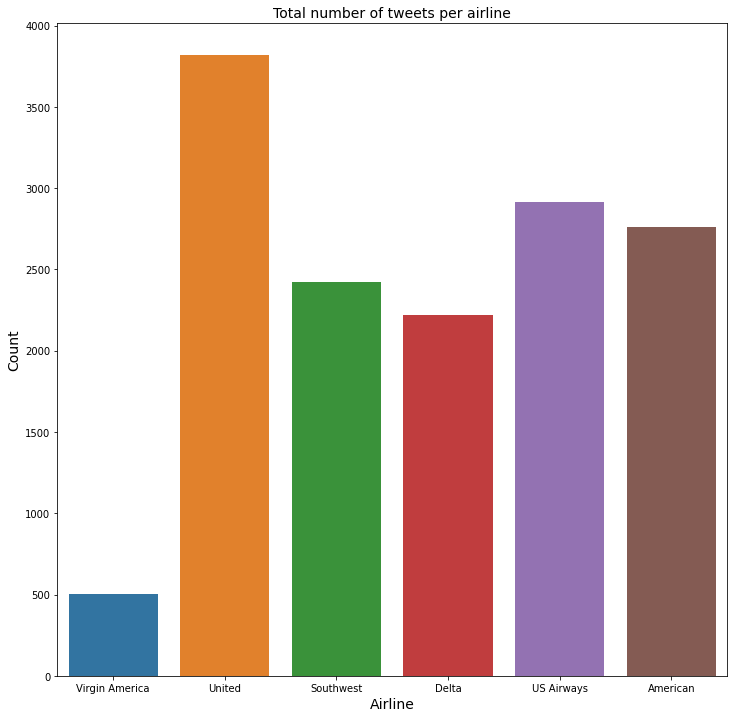

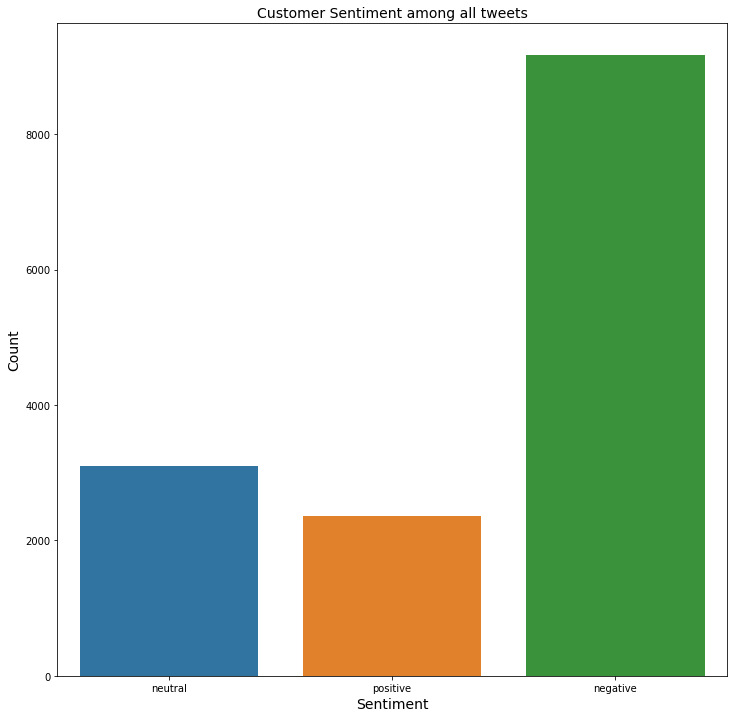

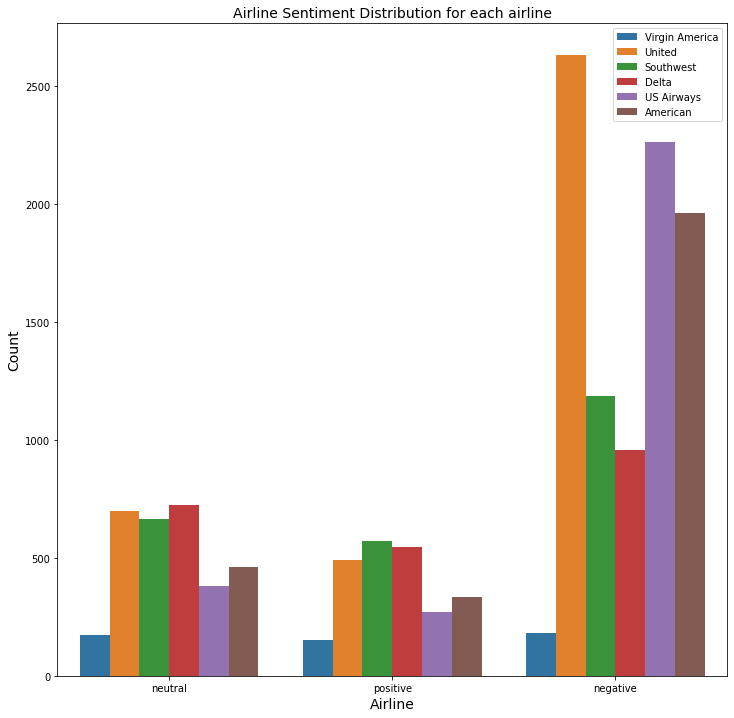

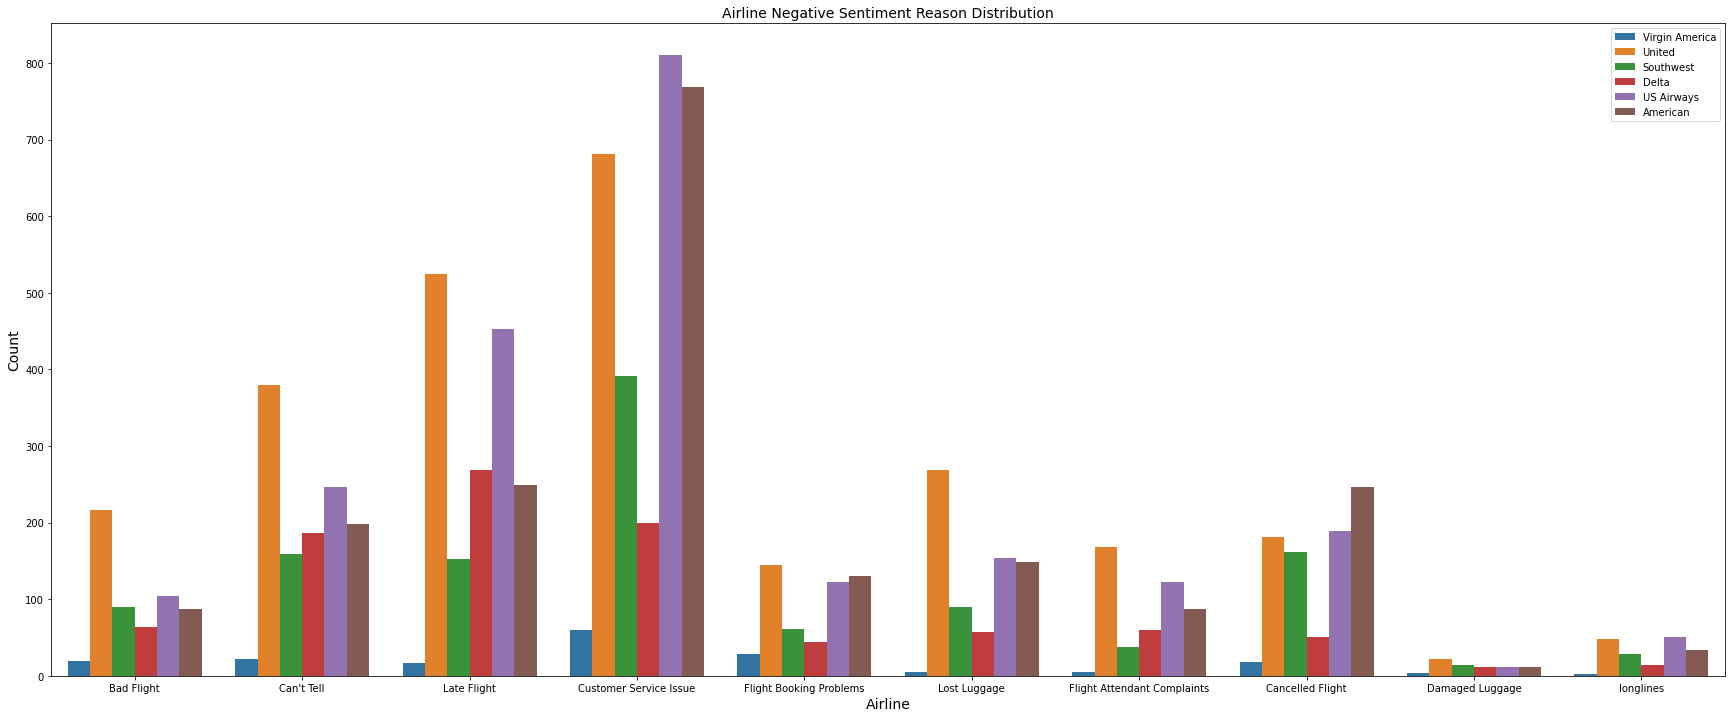

In [ ]:
eda_graphs(data)

In [ ]:
### Negative WordCloud 

negative_reviews = data[data['airline_sentiment'] == "negative"]
words_neg = ' '.join(negative_reviews["text"])
## clean words by using split 
cleaned_word_neg = " ".join([word for word in words_neg.split()])


import wordcloud
def show_wordcloud(text, title):
    

    
    stopwords = set(wordcloud.STOPWORDS)                                  # instantiate the stopwords from wordcloud to eliminate stop words
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',          # Setting the different parameter of stopwords
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)                             
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

In [ ]:
### Negative WordCloud 

negative_reviews = data[data['airline_sentiment'] == "negative"]
words_neg = ' '.join(negative_reviews["text"])
## clean words by using split 
cleaned_word_neg = " ".join([word for word in words_neg.split()])


import wordcloud
def show_wordcloud(text, title):
   

  text_reviews = data[data['airline_sentiment'] == "negative"]
  words_neg = ' '.join(negative_reviews["text"])
## clean words by using split 
  cleaned_word_neg = " ".join([word for word in words_neg.split()])


  stopwords = set(wordcloud.STOPWORDS)                                  # instantiate the stopwords from wordcloud to eliminate stop words
    
  fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',          # Setting the different parameter of stopwords
                    colormap='viridis', width=800, height=600).generate(text)
    
  plt.figure(figsize=(14,11), frameon=True)                             
  plt.imshow(fig_wordcloud)  
  plt.axis('off')
  plt.title(title, fontsize=30)
  plt.show()

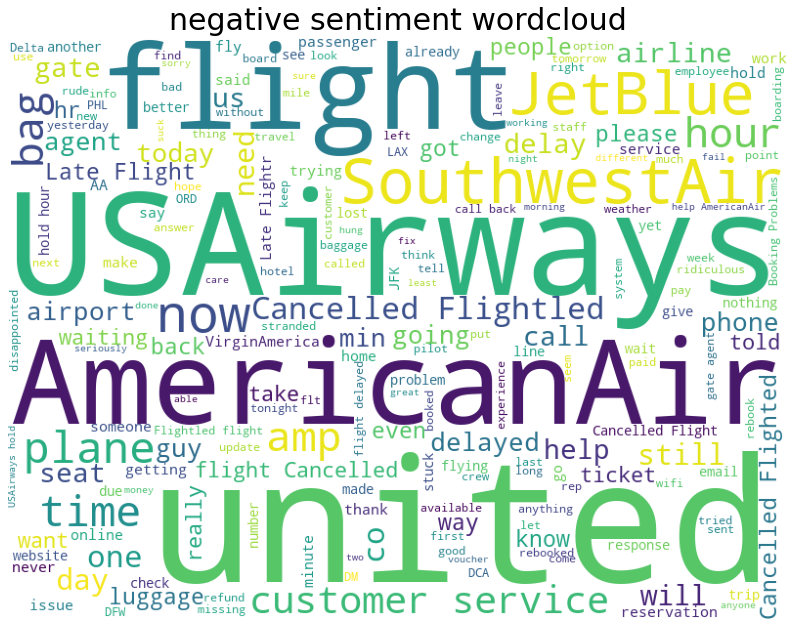

In [ ]:
show_wordcloud(cleaned_word_neg,"negative sentiment wordcloud")

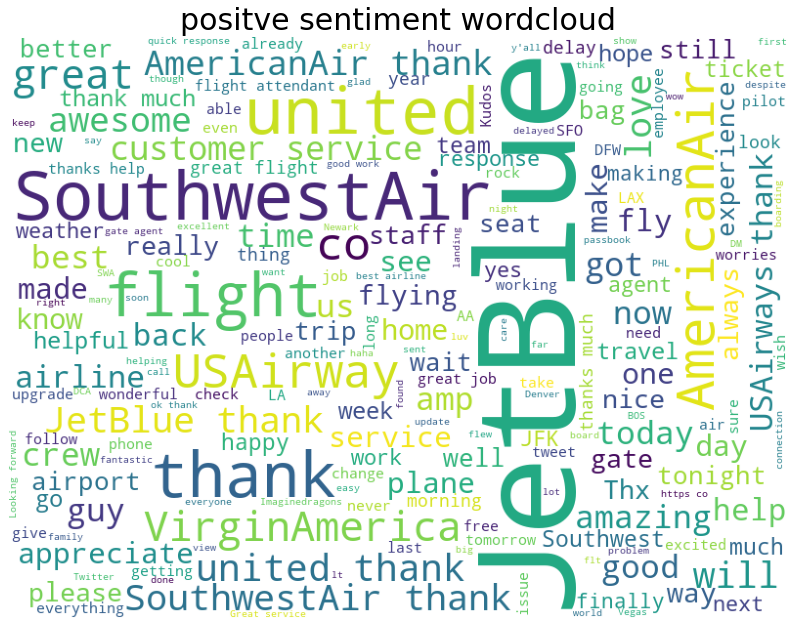

In [ ]:
### positive word cloud
# define positive word cloud

positive_reviews = data[data['airline_sentiment'] == "positive"]
words_pos = ' '.join(positive_reviews["text"])
## clean words by using split 
cleaned_word_pos = " ".join([word for word in words_pos.split()])

show_wordcloud(cleaned_word_pos, "positve sentiment wordcloud")


EDA insights 

Airline sentiment (negative vs positive vs neutral) 
American, US and united airlines have primarily the most amount of negative sentiment reviews. 
There are mostly negative sentiment as compared to neutral and positive reviews. 
-62.6% total of negative reviews
-21.2% total of neutral reviews
-16.1% total of positive reviews 

The top three negative reasons are “can’t tell” , “late flight” , and “customer service issue “. Amongst those reasons the top three airline that that attributed to the overall majority of the negative reasons within the reviews are United,US Airways , and American Airlines.

Word cloud: 
Negative: 
USAirways, American, and united airlines have the biggest font in the wordcloud, this correlates with the tabulation within the cross tab. 
Positive: 
Jetblue, Southwest air, United show up the biggest within the wordcloud. 


In [ ]:
# Taking only 50000 entries for demonstration purpose. As full data will take more time to process.
# Only keeping relevant columns from the data, as these are useful for our analysis.

data = data.loc[::, ['tweet_id','airline_sentiment','text']]

In [ ]:
data.isnull().sum(axis=0)                                # Check for NULL values.

tweet_id             0
airline_sentiment    0
text                 0
dtype: int64

In [ ]:
#data=data.dropna()                                     # Dropping off missing values
#data.columns                                           # Print the column of the dataframe

In [ ]:
data.shape                                            #Shape of the data

(14640, 3)

In [ ]:
pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-turncated Text column.)

data.head()                                 # Check first 5 rows of data

,tweet_id,airline_sentiment,text
0,570306133677760513,neutral,@VirginAmerica What @dhepburn said.
1,570301130888122368,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,570301083672813571,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,570301031407624196,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,570300817074462722,negative,@VirginAmerica and it's a really big bad thing about it


In [ ]:
data.shape                                # Shape of data

(14640, 3)

### **Text Pre-processing:**

- Remove html tags.
- Replace contractions in string. (e.g. replace I'm --> I am) and so on.\
- Remove numbers.
- Tokenization
- To remove Stopwords.
- Lemmatized data

We have used the **NLTK library to tokenize words, remove stopwords and lemmatize the remaining words**

In [ ]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

data['text'] = data['text'].apply(lambda x: strip_html(x))
#data['Summary'] = data['Summary'].apply(lambda x: strip_html(x))

data.head()

,tweet_id,airline_sentiment,text
0,570306133677760513,neutral,@VirginAmerica What @dhepburn said.
1,570301130888122368,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,570301083672813571,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,570301031407624196,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,570300817074462722,negative,@VirginAmerica and it's a really big bad thing about it


In [ ]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data['text'] = data['text'].apply(lambda x: replace_contractions(x))
#data['Summary'] = data['Summary'].apply(lambda x: replace_contractions(x))

data.head()

,tweet_id,airline_sentiment,text
0,570306133677760513,neutral,@VirginAmerica What @dhepburn said.
1,570301130888122368,positive,@VirginAmerica plus you have added commercials to the experience... tacky.
2,570301083672813571,neutral,@VirginAmerica I did not today... Must mean I need to take another trip!
3,570301031407624196,negative,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,570300817074462722,negative,@VirginAmerica and it is a really big bad thing about it


In [ ]:
replace_contractions("won't goto where you're going")

'will not goto where you are going'

In [ ]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text) # Cheatsheet https://www.dataquest.io/blog/regex-cheatsheet/
  return text

data['text'] = data['text'].apply(lambda x: remove_numbers(x))
#data['Summary'] = data['Summary'].apply(lambda x: remove_numbers(x))

data.head()

,tweet_id,airline_sentiment,text
0,570306133677760513,neutral,@VirginAmerica What @dhepburn said.
1,570301130888122368,positive,@VirginAmerica plus you have added commercials to the experience... tacky.
2,570301083672813571,neutral,@VirginAmerica I did not today... Must mean I need to take another trip!
3,570301031407624196,negative,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,570300817074462722,negative,@VirginAmerica and it is a really big bad thing about it


In [ ]:
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
#data['Summary'] = data.apply(lambda row: nltk.word_tokenize(row['Summary']), axis=1) # Tokenization of data

In [ ]:
data.head()                                                                    # Look at how tokenized data looks.

,tweet_id,airline_sentiment,text
0,570306133677760513,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,570301130888122368,positive,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]"
2,570301083672813571,neutral,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]"
3,570301031407624196,negative,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]"
4,570300817074462722,negative,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]"


In [ ]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
type(stopwords)

nltk.corpus.reader.wordlist.WordListCorpusReader

In [ ]:
stopwords = stopwords.words('english')


customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))                              

In [ ]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)
#data['Summary'] = data.apply(lambda row: normalize(row['Summary']), axis=1)
data.head(5)

,tweet_id,airline_sentiment,text
0,570306133677760513,neutral,virginamerica dhepburn say
1,570301130888122368,positive,virginamerica plus add commercials experience tacky
2,570301083672813571,neutral,virginamerica not today must mean need take another trip
3,570301031407624196,negative,virginamerica really aggressive blast obnoxious entertainment guests face little recourse
4,570300817074462722,negative,virginamerica really big bad thing


### **Building the model based on CountVectorizer and Random Forest**

In [ ]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

bow_vec = CountVectorizer(max_features=2000)                # Keep only 2000 features as number of features will increase the processing time.
data_features = bow_vec.fit_transform(data['text'])

data_features = data_features.toarray()                        # Convert the data features to array.

In [ ]:
data_features.shape

(14640, 2000)

In [ ]:
data_features[1]

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# instantiate tfid vecotrizer 


bow_vec = TfidfVectorizer(max_features=2500)                # Keep only 2000 features as number of features will increase the processing time.
data_featurestf = bow_vec.fit_transform(data['text'])

data_featurestf = data_featurestf.toarray()  


In [ ]:
# encode y variable

y = pd.get_dummies(data["airline_sentiment"])

In [ ]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(data_features, y, test_size=0.3, random_state=3)

In [ ]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4) # n_estimators default=100, n_jobsint, default=None The number of jobs to run in parallel.

forest = forest.fit(X_train_cv, y_train_cv)

print(forest)

print(np.mean(cross_val_score(forest, data_features, y, cv=10))) # default scorer = accuracy

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.6670765027322404


### **Optimizing the parameter: Number of trees in the random forest model(n_estimators)**

In [ ]:

# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]
base_ln

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [ ]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train_cv, y_train_cv, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

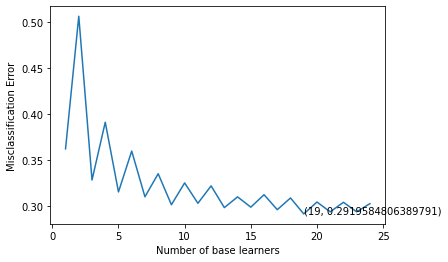

In [ ]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [ ]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train_cv, y_train_cv)
clf.score(X_test_cv, y_test_cv)

0.714936247723133

In [ ]:
optimal_learners

19

In [ ]:
result =  clf.predict(X_test_cv)                  #saving the prediction on test data as a result

In [ ]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test_cv, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "12"],
                  columns = [i for i in "12"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g');

ValueError: ignored

In [ ]:
### fit model with tfid vectorizer

X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(data_featurestf, y, test_size=0.3, random_state=3)

# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest_tf = RandomForestClassifier(n_estimators=10, n_jobs=4) # n_estimators default=100, n_jobsint, default=None The number of jobs to run in parallel.

forest_tf = forest_tf.fit(X_train_tf, y_train_tf)

print(forest_tf)

print(np.mean(cross_val_score(forest_tf, data_featurestf, y, cv=10))) # default scorer = accuracy

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.6653688524590164


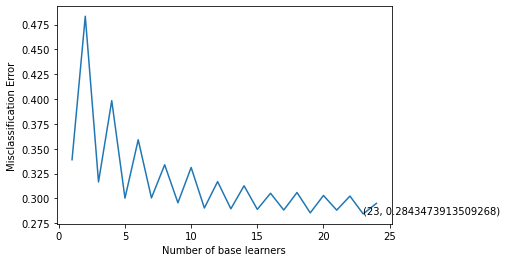

In [ ]:
# find optimal base learners and hypertune

# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf_tf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf_tf, X_train_tf, y_train_tf, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

    # plotting the error as k increases
error = [1 - x for x in cv_scores]                                              #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                             #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                                        #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [ ]:
# Training the best model and calculating accuracy on test data .
clf_tf = RandomForestClassifier(n_estimators = optimal_learners)
clf_tf.fit(X_train_tf, y_train_tf)
clf_tf.score(X_test_tf, y_test_tf)

0.7135701275045537

In [ ]:
from sklearn.model_selection import GridSearchCV
import time
start = time.time()

parameters = {
               "n_estimators": [110,251,501],
               "min_samples_leaf": np.arange(1, 6,1),
               "max_features": [0.7,0.9,'log2','auto'],
               "max_samples": [0.7,0.9,None],
    
    
    
}

#rf_grid = GridSearchCV(RandomForestClassifier(class_weight= {0:class_weight_0,1:class_weight_1}, random_state=1,bootstrap=True),

rf_grid = GridSearchCV(RandomForestClassifier( random_state=1,bootstrap=True), 
                       param_grid=parameters, scoring = 'precision', cv = 5)
rf_grid= rf_grid.fit(X_train_tf, y_train_tf)

# set the clf to the best combo of parameters 
rf_grid_estimator = rf_grid.best_estimator_

rf_grid_estimator.fit(X_train_tf,y_train_tf)

end = time.time()

print(end-start)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1765, in precision_score
    zero_division=zero_division,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1544, in precision_recall_fscore_support
    labels = _check_set_wise_la

KeyboardInterrupt: ignored

In [ ]:
type(y_train_tf)

pandas.core.frame.DataFrame

In [ ]:
### handle class imbalance by upsampling and checking score 

# Handling imbalanced using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()
#x_sm,y_sm = smote.fit_resample(X_train_tf,y_train_tf)
x_sm,y_sm = smote.fit_resample(np.array(X_train_tf),np.array(y_train_tf))


X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.25,random_state=3)

### fit model with tfid vectorizer

#X_train, X_test, y_train, y_test = train_test_split(data_featurestf, y, test_size=0.3, random_state=3)

# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest_tf = RandomForestClassifier(n_estimators=25, n_jobs=4) # n_estimators default=100, n_jobsint, default=None The number of jobs to run in parallel.

forest_tf = forest_tf.fit(X_train, y_train)

print(forest_tf)

print(np.mean(cross_val_score(forest_tf, X_test, y_test, cv=10))) # default scorer = accuracy

RandomForestClassifier(n_estimators=25, n_jobs=4)
0.7443213768424639


In [ ]:
# find optimal number of learners for random forest 

# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1,150,20)]
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

NameError: ignored

### **Word Cloud of top 40 important features from the CountVectorizer + Random Forest based model**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


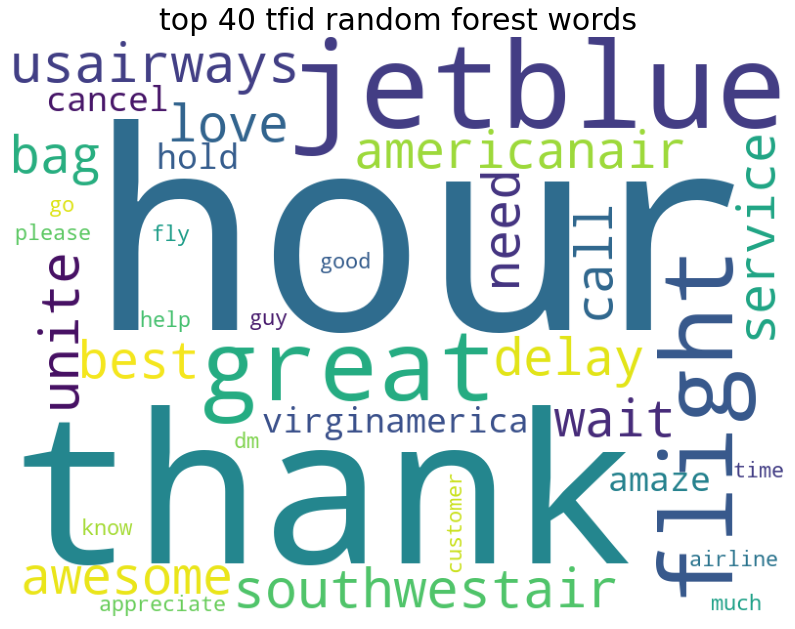

In [ ]:


all_features = bow_vec.get_feature_names()              #Get the features from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model based on featire importance
feat=forest_tf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
    
    
show_wordcloud(top_features,"top 40 tfid random forest words")


Conclusion : 


After running the model after tuning, the score that was reached was 74.4%. I saw a bit of improvement after I took care of the heavily biased negative class. I used smote to upsample the data to balance out the classes. The top 40 word cloud features after running the tuned model were the following. Thank, hour and jet blue showed up as the top features of the vectorizer model. The score was increased by adjusting the number of features and finding the optimal amount of trees to use within the random forest framework. 
